# PROBLEMAS Y PREGUNTA 

- Análisis de la Volatilidad de Precios:
Calcula la desviación estándar de los precios para medir la volatilidad de los precios de los productos.
Identifica qué productos o mercados tienen la mayor volatilidad de precios, lo cual puede indicar un mayor riesgo o incertidumbre.

- Variaciones de Precios y Posible Demanda:
Se puede inferir, que si los precios suben, la demanda podría disminuir, y viceversa.
Analiza como las variaciones de los precios, afectan a los diferentes mercados, y grupos de productos.


# Cargue de dataset

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def limpiar_precio(valor):
    valor_str = str(valor)
    valor_str = valor_str.replace(".", "")
    return int(valor_str)
    
df = pd.read_csv('mensual 23.csv',converters={"Precio promedio por kilogramo*": limpiar_precio}, delimiter = ';', header = 0, encoding='windows-1252', usecols = range(5))
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.head()

,Fecha,Grupo,Producto,Mercado,Precio promedio por kilogramo*
0,2023-01-01,PROCESADOS,Café instantáneo,"Cali, Siloé",184278
1,2023-12-01,PROCESADOS,Café instantáneo,"Cali, Siloé",182222
2,2023-02-01,PROCESADOS,Café instantáneo,"Cali, Siloé",180903
3,2023-11-01,PROCESADOS,Café instantáneo,"Cali, Siloé",180417
4,2023-05-01,PROCESADOS,Café instantáneo,"Cali, Siloé",178722


In [11]:
df.nunique()

Fecha                                12
Grupo                                 8
Producto                            349
Mercado                              82
Precio promedio por kilogramo*    16829
dtype: int64

In [12]:
#Conocer los tipos de datos del dataset
df.dtypes

Fecha                             datetime64[ns]
Grupo                                     object
Producto                                  object
Mercado                                   object
Precio promedio por kilogramo*             int64
dtype: object

### Transformación de variables

In [13]:
#Transformar variable de campo 'Grupo' a categórico
df['Grupo'] = df['Grupo'].astype('category')
#Transformar variables de campo 'Fecha' a String
#df['Fecha'] = df['Fecha'].astype(str)
df.dtypes

Fecha                             datetime64[ns]
Grupo                                   category
Producto                                  object
Mercado                                   object
Precio promedio por kilogramo*             int64
dtype: object

### Verificación de integridad de los datos

In [14]:
#Consultar datos null
df.isnull().sum()

Fecha                             0
Grupo                             0
Producto                          0
Mercado                           0
Precio promedio por kilogramo*    0
dtype: int64

### Análisis exploratorio de los datos

In [15]:
# Estadística descriptiva de Precio por kilogramo
print('Estadística descriptiva variables categóricas')
print(df.describe(include='object'))
print('\nEstadística descriptiva precio promedio por kilo')
print(df.describe())

Estadística descriptiva variables categóricas
               Producto                                   Mercado
count             53807                                     53807
unique              349                                        82
top     Tomate de árbol  Medellín, Central Mayorista de Antioquia
freq                555                                      2464

Estadística descriptiva precio promedio por kilo
                               Fecha  Precio promedio por kilogramo*
count                          53807                    53807.000000
mean   2023-06-16 23:42:18.606501120                    10130.693999
min              2023-01-01 00:00:00                      205.000000
25%              2023-04-01 00:00:00                     2445.000000
50%              2023-07-01 00:00:00                     4734.000000
75%              2023-10-01 00:00:00                    14125.000000
max              2023-12-01 00:00:00                   184278.000000
std                   

### Análisis de la Volatilidad de Precios

In [26]:
#AGRUPACIÓN POR PRODUCTO y su desviación estandar del precio
agrupacion_productos = df.groupby('Producto').agg({'Precio promedio por kilogramo*':'std'}).round(2)
agrupacion_productos= agrupacion_productos.sort_values(by='Precio promedio por kilogramo*', ascending=False)
print(agrupacion_productos.head(20))

#AGRUPACIÓN POR Mercado y su desviación estandar del precio
agrupacion_mercados = df.groupby('Mercado').agg({'Precio promedio por kilogramo*':'std'}).round(2)
agrupacion_mercados= agrupacion_mercados.sort_values(by='Precio promedio por kilogramo*', ascending=False)
print(agrupacion_mercados.head(20))

                                Precio promedio por kilogramo*
Producto                                                      
Café instantáneo                                      20161.25
Langostino U12                                        16652.19
Carne de res, lomo fino                               11116.52
Carne de res, punta de anca                            8325.83
Carne de res, chatas                                   7792.61
Langostino 16-20                                       7713.95
Róbalo, filete congelado                               7712.41
Leche en polvo                                         7447.01
Camarón tití precocido seco                            6830.13
Calamar anillos                                        6658.14
Pargo rojo entero congelado                            6650.73
Carne de res, costilla                                 6329.81
Pargo rojo platero                                     5926.54
Fécula de maíz                                         

In [27]:
agrupacion_mercados.head()

,Precio promedio por kilogramo*
Mercado,
"Cali, Siloé",29092.76
"Cali, La Floresta",28501.68
"Bogotá, D.C., Plaza España",20466.16
"Bucaramanga, Frigoríficos",19843.14
Buenaventura (Valle del Cauca),19633.49


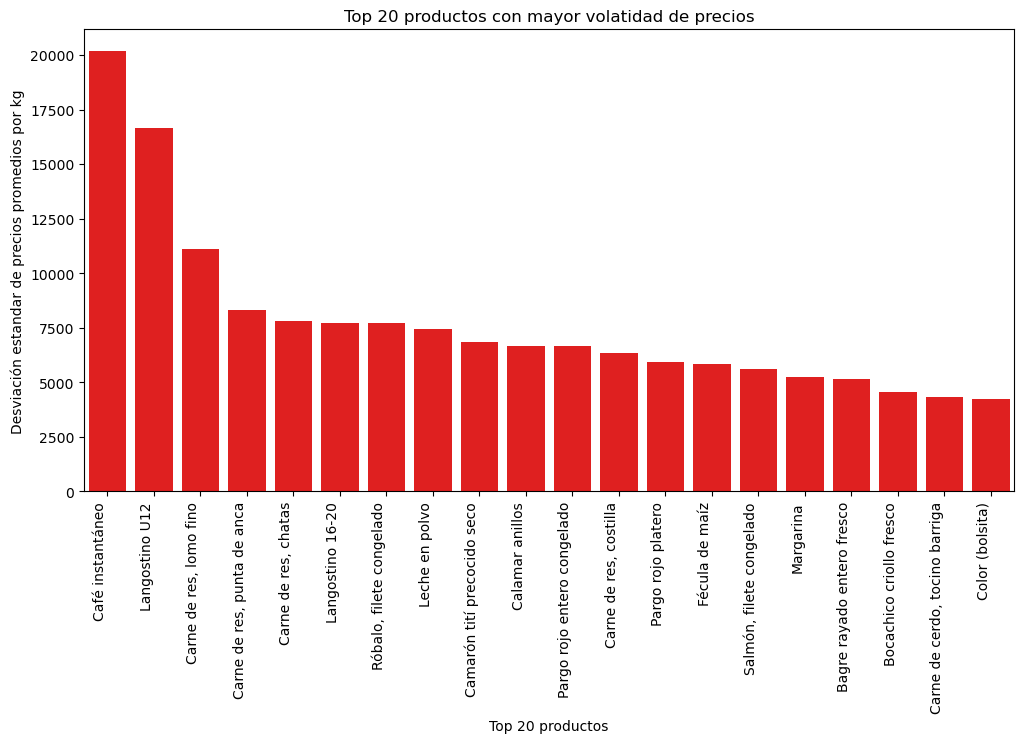

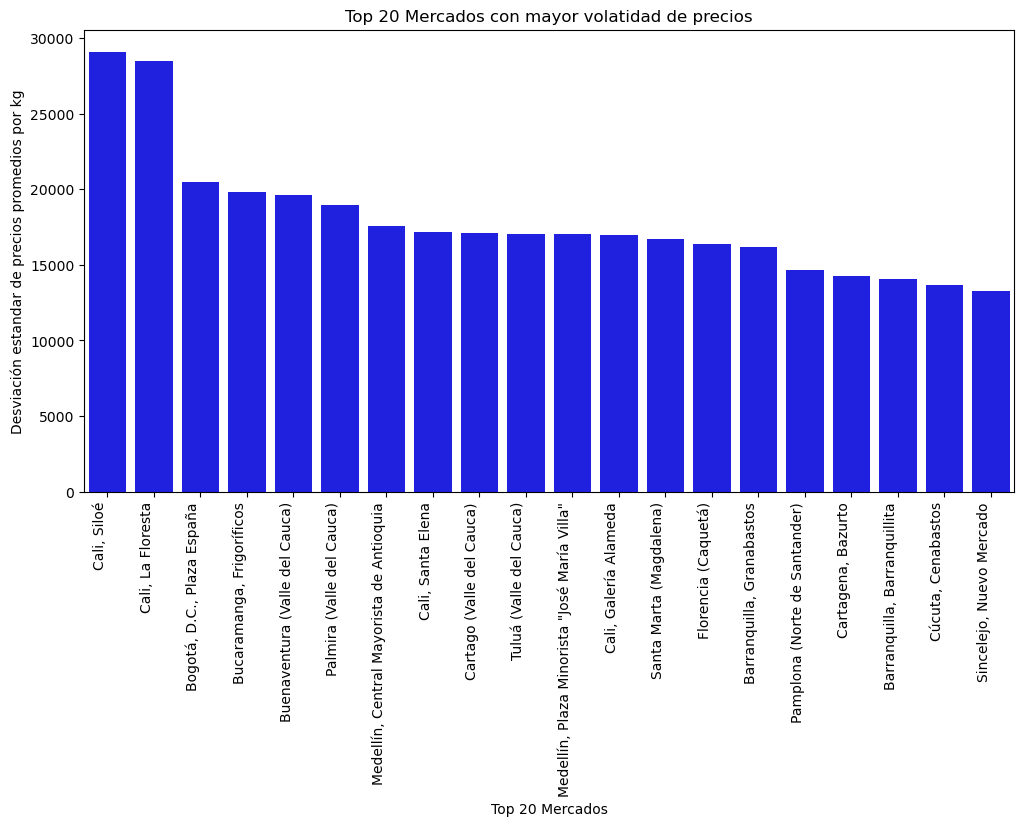

In [28]:
#Visualización de volatidad de los precios top.
top_20_productos = agrupacion_productos.head(20)
top_20_mercados = agrupacion_mercados.head(20)

# Crear el histograma precio vs producto
plt.figure(figsize=(12, 6))  # Ajusto el tamaño del gráfico
sns.barplot(x=top_20_productos.index, y='Precio promedio por kilogramo*', data=top_20_productos, color='red')
plt.xticks(rotation=90, ha='right')
plt.title('Top 20 productos con mayor volatidad de precios')
plt.xlabel('Top 20 productos')
plt.ylabel('Desviación estandar de precios promedios por kg')
plt.show()

# Crear el histograma precio vs mercado
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico
sns.barplot(x=top_20_mercados.index, y='Precio promedio por kilogramo*', data=top_20_mercados, color='blue')
plt.xticks(rotation=90, ha='right')
plt.title('Top 20 Mercados con mayor volatidad de precios')
plt.xlabel('Top 20 Mercados')
plt.ylabel('Desviación estandar de precios promedios por kg')
plt.show()

### Análisis de la Volatilidad de Precios en el año mensualmente

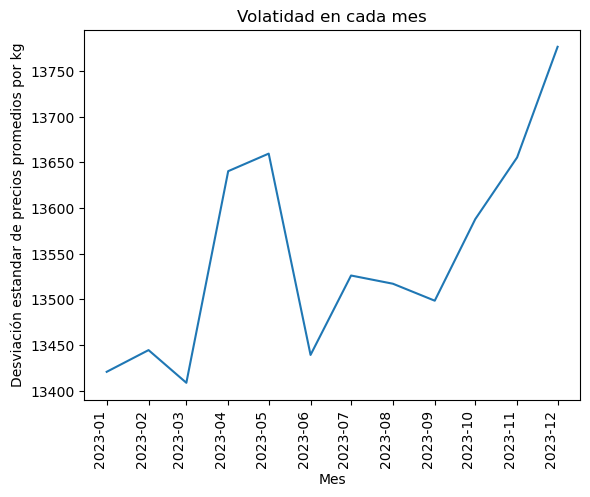

In [29]:
import matplotlib.dates as mdates
#Agrupamiento de precios según el mes
#AGRUPACIÓN POR Mes y su desviación estandar del precio
agrupacion_mes = df.groupby('Fecha').agg({'Precio promedio por kilogramo*':'std'}).round(2)
agrupacion_mes= agrupacion_mes.sort_values(by='Fecha', ascending=True)
#Gráfico de líneas para analizar la desviación en cada mes
sns.lineplot(x = 'Fecha', y= 'Precio promedio por kilogramo*', data = agrupacion_mes)
plt.xticks(rotation=90, ha='right')
plt.title('Volatidad en cada mes')
plt.xlabel('Mes')
plt.ylabel('Desviación estandar de precios promedios por kg')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

## Variaciones de Precios y Posible Demanda

### Análisis de correlación

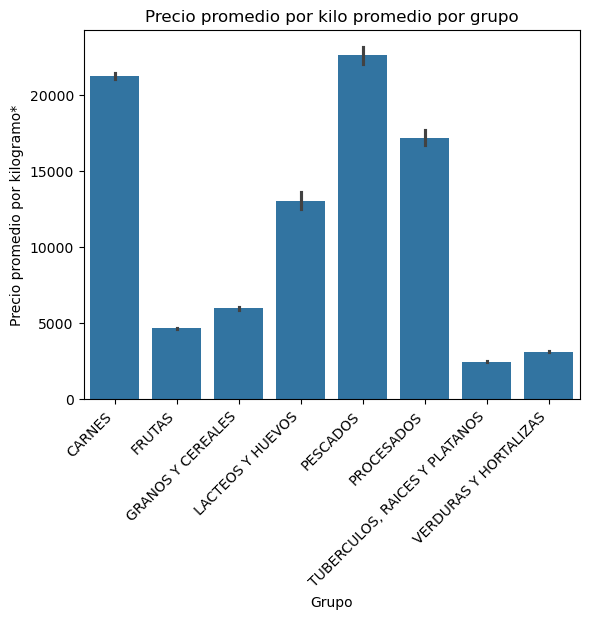

In [20]:
#Gráfica de dispersión entre Grupo y precio promedio por kilo
sns.barplot(x="Grupo", y="Precio promedio por kilogramo*", data=df)
plt.title("Precio promedio por kilo promedio por grupo")
plt.xticks(rotation=45, ha="right")
plt.show()

### Análisis de correlación a través del tiempo

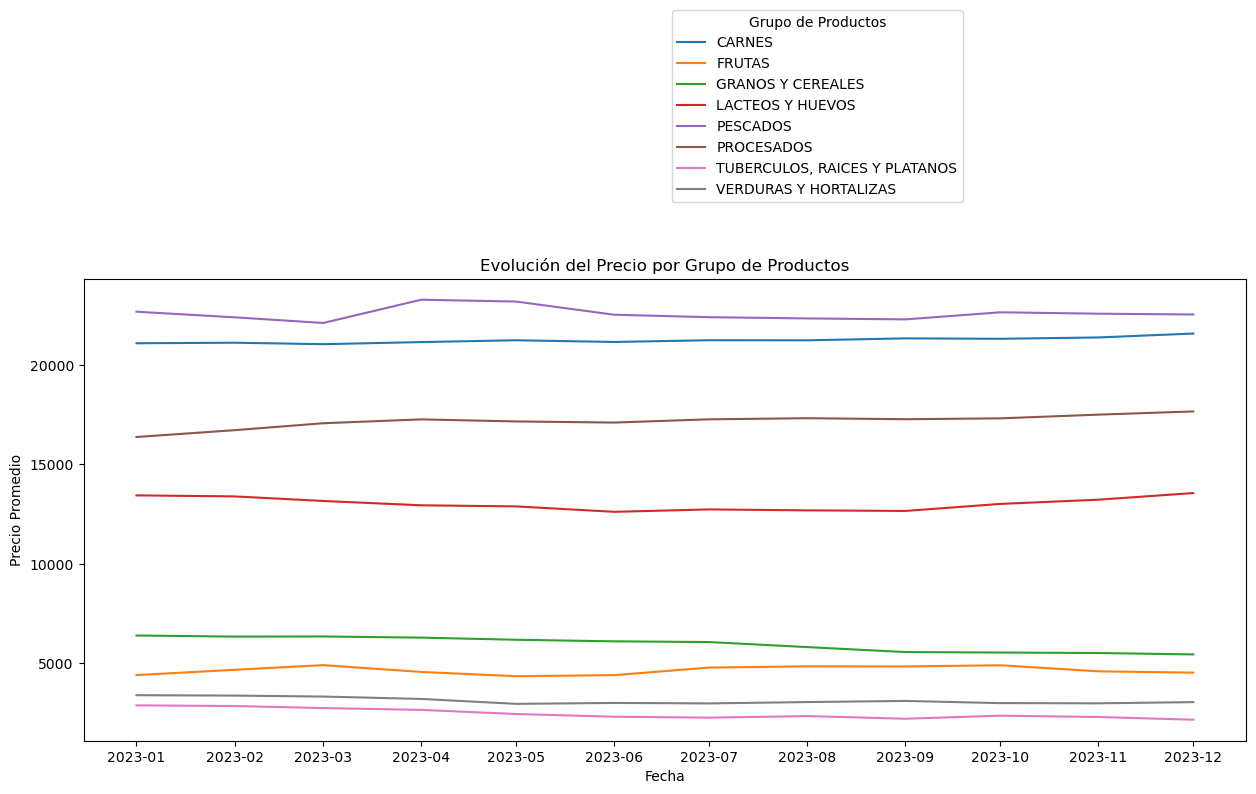

In [30]:
# Agrupar los datos por grupo y fecha y calcular el precio promedio
df_evolucion_grupo = df.groupby(['Grupo', 'Fecha'],observed = True)['Precio promedio por kilogramo*'].mean().reset_index().round(2)
# Crear el gráfico de líneas múltiples
plt.figure(figsize=(15, 6))  # Ajusta el tamaño de la figura si es necesario
sns.lineplot(x='Fecha', y='Precio promedio por kilogramo*', hue='Grupo', data=df_evolucion_grupo)
plt.title('Evolución del Precio por Grupo de Productos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend(title='Grupo de Productos', bbox_to_anchor=(0.5, 1.15))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

## CONCLUSIÓN DE ANÁLISIS

- Se pudo evidenciar que los productos los cuales presentan mayor volatilidad son:
Café instantáneo                                  
Langostino U12                                   
Carne de res, lomo fino                        
Carne de res, punta de anca                      
Carne de res, chatas                               
Langostino 16-20                                 
Róbalo, filete congelado                        
Leche en polvo                                    
Camarón tití precocido seco                    
Calamar anillos
- Los mercados los cuales presentan mayor volatilidad son:
Cali, Siloé                                                     
Cali, La Floresta                                              
Bogotá, D.C., Plaza España                                      
Bucaramanga, Frigoríficos                                   
Buenaventura (Valle del Cauca)                                 
Palmira (Valle del Cauca)                                   
Medellín, Central Mayorista de Antioquia                        
Cali, Santa Elena                                               
Cartago (Valle del Cauca)                                       
Tuluá (Valle del Cauca)
- Desde el mes de septiembre hasta diciembre, se presentó un crecimiento exponencial en los precios.
- Existe una correlación con las compras des los grupos de productos :
Carnes, pescados

### EXPORTAR TABLA GENERAL Y TRANSFORMACIONES

In [31]:
#Reinicio indices de Df agrupados.
agrupacion_productos = agrupacion_productos.reset_index()
agrupacion_mercados = agrupacion_mercados.reset_index()
agrupacion_mes = agrupacion_mes.reset_index()

In [32]:
dataframes = {
    'Tabla_base': df,
    'agrupacion_productos': agrupacion_productos,
    'agrupacion_mercados': agrupacion_mercados,
    'agrupacion_mes': agrupacion_mes,
    'tabla_evolucion_grupo': df_evolucion_grupo
}

for nombre_df, df_real in dataframes.items():
    nombre_archivo = f"{nombre_df}.csv"
    df_real.to_csv(nombre_archivo, index=False) # Exportar a CSV sin índice
    print(f"\nDataFrame exportado exitosamente a '{nombre_archivo}' en formato CSV.")
    
print(f"Los DF se han exportado exitosamente.")



DataFrame exportado exitosamente a 'Tabla_base.csv' en formato CSV.

DataFrame exportado exitosamente a 'agrupacion_productos.csv' en formato CSV.

DataFrame exportado exitosamente a 'agrupacion_mercados.csv' en formato CSV.

DataFrame exportado exitosamente a 'agrupacion_mes.csv' en formato CSV.

DataFrame exportado exitosamente a 'tabla_evolucion_grupo.csv' en formato CSV.
Los DF se han exportado exitosamente.


### EXPORTACIÓN VISUALIZACIÓN DASHBOARD EN POWER BI

Enlace de visualización : https://app.powerbi.com/view?r=eyJrIjoiZGJmN2YwNjYtNzJjMy00ZGJmLWFjYTMtYTk2MWIwMjY4NjNkIiwidCI6ImZjMDA1NDdhLTI0YmItNGU0Zi05ZDYxLTczZmNhNWViOWRmMyIsImMiOjR9 